In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('EDA_Gold_Silver_prices.csv')
df.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [31]:
def extract_month_year(date_str):
    # Parse the date string
    month_str, year_str = date_str.split('-')
    
    # Convert the month string to a month number
    month = pd.to_datetime(month_str, format='%b').month
    
    # Convert the year to a four-digit year
    year = int(year_str)
    if year >=90 and year <=99:
        year +=1900
    elif year >=0 and year <=18:
        year += 2000
    

    return month, year


In [32]:
df[['month', 'year']] = df['Month'].apply(lambda x: pd.Series(extract_month_year(x)))

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [33]:
df.head()

,Month,SilverPrice,GoldPrice,month,year
0,Mar-97,186.48,12619.24,3,1997
1,Apr-97,170.65,12338.59,4,1997
2,May-97,170.44,12314.94,5,1997
3,Jun-97,169.96,12202.78,6,1997
4,Jul-97,155.80,11582.07,7,1997


In [34]:
df[['SilverPrice', 'GoldPrice']].corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


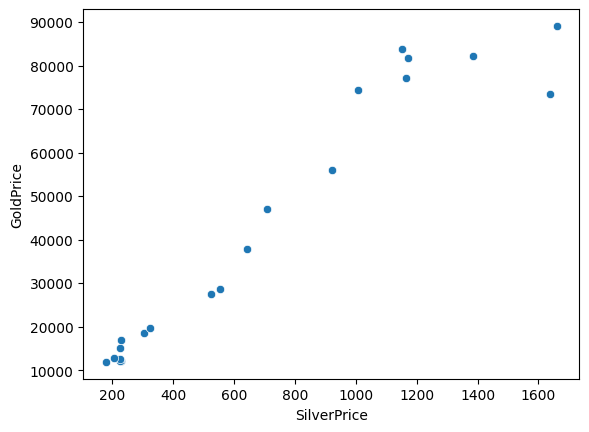

In [46]:
row_condition_1 = df['year'] == 2008
data = df[row_condition_1]
# print(data.head())
# data[['SilverPrice', 'GoldPrice']].corr()
# sns.scatterplot(data=data, x='SilverPrice', y='GoldPrice')
# plt.show()
data = df[[
    'SilverPrice',
    'GoldPrice',
    'year'
]]
data = data.groupby('year').agg({
    'SilverPrice': ['mean'],
    'GoldPrice': ['mean']
})
data.columns = ['SilverPrice', 'GoldPrice']
data = data.reset_index()
sns.scatterplot(data=data, x='SilverPrice', y='GoldPrice')
plt.show()